In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Identify numerical columns for scaling
numerical_columns = df_market_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data
df_market_data[numerical_columns] = scaler.fit_transform(df_market_data[numerical_columns])

df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [6]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_market_data, columns=numerical_columns, index=df_market_data.index)

# Copy the crypto names from the original data(already set while loading)
df_scaled['crypto_name'] = df_market_data.index

# Set the coinid column as index (Already set coin_id as index while loading)
# df_scaled.set_index('coin_id', inplace=True)

# # Explicitly reset and set the index (optional)
# df_scaled.reset_index(inplace=True)
# df_scaled.set_index('coin_id', inplace=True)

# Display sample data
df_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_name
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,bitcoin
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,ethereum
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,tether
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,ripple
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,bitcoin-cash


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))  # Range from 1 to 11 (exclusive)
print("List of k-values:", k_values)


List of k-values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [8]:
df_market_data_scaled = scaler.fit_transform(df_market_data)
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):  # Range from 1 to 11 (exclusive)
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmean = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmean.fit(df_market_data_scaled)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmean.inertia_)

inertia_values



c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

[287.0,
 212.1233420748626,
 170.193570879703,
 79.02243535120977,
 71.0979135124442,
 66.1088267804475,
 54.48812315624117,
 43.224692666580424,
 32.86088447122681,
 28.404884636873092,
 24.116198421409198]

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {}
# Create a for loop to compute inertia with each possible value of k
for k in range(1, 12):  # Range from 1 to 11 (exclusive)
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(df_market_data_scaled)
    
    # Store inertia value in the dictionary
    elbow_data[k] = kmeans.inertia_

# Display the Elbow curve data dictionary
elbow_data


c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

{1: 287.0,
 2: 212.1233420748626,
 3: 170.193570879703,
 4: 79.02243535120977,
 5: 71.0979135124442,
 6: 66.1088267804475,
 7: 54.48812315624117,
 8: 43.224692666580424,
 9: 32.86088447122681,
 10: 28.404884636873092,
 11: 24.116198421409198}

In [10]:
#Convert dictionary to a DataFrame for plotting
df_elbow = pd.DataFrame(list(elbow_data.items()), columns=['Number of Clusters', 'Inertia'])

# Display the DataFrame for the Elbow curve data
df_elbow

,Number of Clusters,Inertia
0,1,287.000000
1,2,212.123342
2,3,170.193571
3,4,79.022435
4,5,71.097914
5,6,66.108827
6,7,54.488123
7,8,43.224693
8,9,32.860884
9,10,28.404885


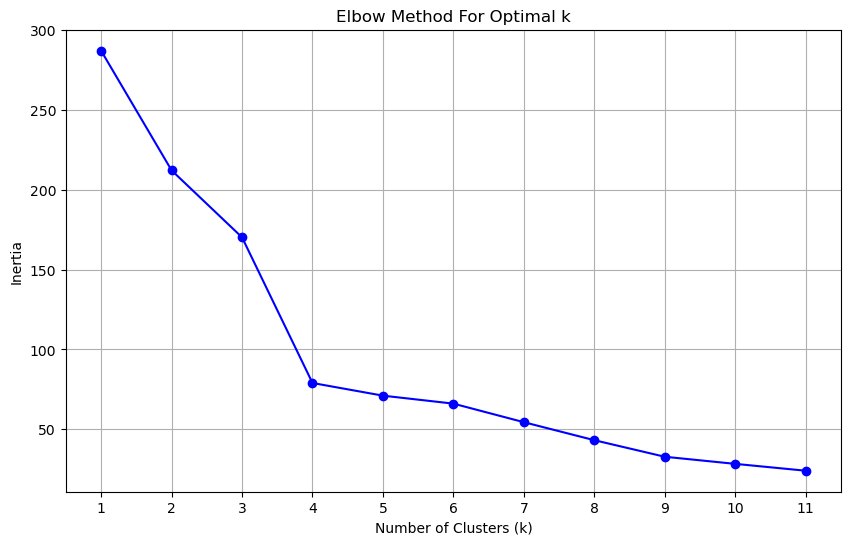

In [11]:
# Plot a line chart with all the inertia values computed with 
# Plotting the Elbow curve
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
To determine the best value for 𝑘
k (number of clusters), typically we look for the point where the decrease in inertia (or within-cluster sum of squares) starts to level off significantly. In your provided data:

Number of Clusters (k) ranges from 1 to 11.
Inertia decreases as the number of clusters increases.
The best value for 𝑘
k can often be identified using the "elbow method" or by examining the rate of decrease in inertia. From the data:

As 
𝑘 increases, inertia decreases steeply from 287.0 (for 𝑘 = 1) down to 54.5 (for 𝑘 = 7). 
Beyond 𝑘 = 7, the decrease in inertia continues, but at a decreasing rate.

The "elbow" point, where the rate of decrease in inertia slows down significantly, is around 
𝑘 = 7 or 𝑘 = 8
Therefore, based on this inertia data, the best value for 
k appears to be 7 or 8.



---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
k = 7  # or k = 8
kmeans = KMeans(n_clusters=k, random_state=42)

In [13]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_market_data_scaled)

c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
cluster_predictions

array([4, 4, 2, 2, 5, 4, 4, 4, 4, 2, 2, 2, 2, 5, 2, 0, 2, 0, 4, 2, 2, 4,
       2, 2, 2, 2, 0, 2, 4, 6, 0, 0, 3, 4, 0, 2, 1, 2, 4, 2, 2])

In [15]:
#Get cluster labels
cluster_labels = kmeans.labels_

# Assign cluster labels back to your original DataFrame if needed
df_market_data['Cluster'] = cluster_labels

# Optionally, you can also get centroids of clusters
cluster_centers = kmeans.cluster_centers_
df_market_data.head(5)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,4
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,4
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,5


In [16]:
# Create a copy of the DataFrame
df_market_data_copy = df_market_data.copy()

In [17]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_copy['Cluster'] = cluster_predictions

# Display sample data
df_market_data_copy.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,4
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,4
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,5


In [18]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name/coinID in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',  # Color points by 'Cluster' column
    colormap='viridis',  # Choose a colormap
    hover_cols=['coin_id'],  # Show 'crypto_name' in hover info
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    title='Cryptocurrency Clustering'
)

# Display the plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
# Step 1: Standardize the Data
scaler = StandardScaler()
numerical_columns = df_market_data_copy.select_dtypes(include=['float64', 'int64']).columns
df_scaled = scaler.fit_transform(df_market_data_copy[numerical_columns])

# Step 2: Create PCA model instance with n_components=3
pca = PCA(n_components=3)  # Set n_components=3 for three principal components
principal_components = pca.fit_transform(df_scaled)

# Print explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

# Optionally, you can also print the cumulative explained variance ratio
cumulative_variance = explained_variance.cumsum()
print(f"Cumulative Explained Variance Ratio: {cumulative_variance}")


Explained Variance Ratio: [0.3719856  0.34700813 0.17603793]
Cumulative Explained Variance Ratio: [0.3719856  0.71899373 0.89503166]


In [20]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_copy.index)


# View the first five rows of the DataFrame. 
df_pca.head(5)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [21]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
# Display explained variance ratio for each principal component
for i, ev in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {ev:.3f}")

# Optionally, you can also print the cumulative explained variance ratio
cumulative_variance = explained_variance.cumsum()
print(f"Cumulative Explained Variance Ratio: {cumulative_variance[-1]:.3f}")


Explained Variance for PC1: 0.372
Explained Variance for PC2: 0.347
Explained Variance for PC3: 0.176
Cumulative Explained Variance Ratio: 0.895


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [22]:
print(df_market_data_copy.columns)


Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y', 'Cluster'],
      dtype='object')


In [23]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'], index=df_market_data_copy.index)
# Creating a DataFrame with the PCA data
# Set the coinid column as index (Already set)
df_pca.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [24]:
#Copy crypto names from original data to df_pca
df_pca['coin_id'] = df_market_data_copy.index
df_pca.head()

,PC1,PC2,PC3,coin_id
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin
ethereum,-0.458261,0.458466,0.952877,ethereum
tether,-0.433070,-0.168126,-0.641752,tether
ripple,-0.471835,-0.222660,-0.479053,ripple
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash


---

### Find the Best Value for k Using the PCA Data

In [25]:
df_pca_numerical = df_pca.drop(columns=['coin_id'], errors='ignore')
df_pca_numerical.head(3)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752


In [26]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [27]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_numerical)  # Use PCA-transformed numerical data for clustering
    inertia_values.append(kmeans.inertia_)


c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have

In [28]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters': k_values,
    'Inertia': inertia_values
}

# Convert the dictionary to a DataFrame
df_elbow_1 = pd.DataFrame(elbow_data)
df_elbow_1


,Number of Clusters,Inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


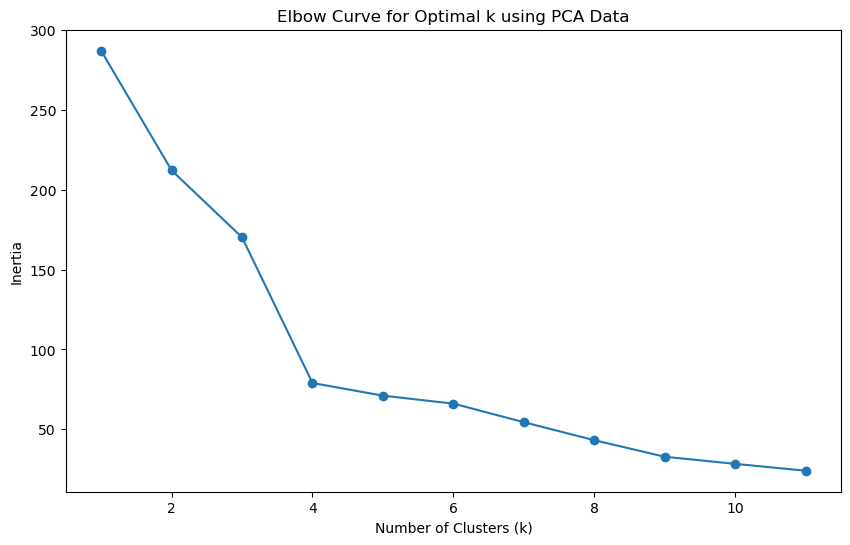

In [29]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(df_elbow_1['Number of Clusters'], df_elbow['Inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for Optimal k using PCA Data')
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
  To determine the best value for k, we look at the elbow curve, which plots the number of clusters against the inertia values. The "elbow" point, where the rate of decrease in inertia slows down significantly, is typically considered the optimal number of clusters.
  The significant drop in inertia occurs at k = 4, where the inertia value drops from 140.431833 to 49.665497. After k = 4, the rate of decrease slows down.

Therefore, the best value for k when using the PCA data appears to be 4.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  Based on the original inertia values provided:
  The significant drop in inertia using the original data occurs at k = 3, where the inertia value drops from 212.123342 to 170.193571. After k = 3, the rate of decrease slows down.

Therefore, the best value for k when using the original data is 3.

# comparison:
Yes, the best value for k differs when using the PCA data compared to the original data:

- Original data: The best k value is 3.
- PCA data: The best k value is 4.
This difference suggests that PCA transformation has an impact on the clustering structure of the data, potentially revealing different underlying patterns.



### Cluster Cryptocurrencies with K-means Using the PCA Data

In [30]:
# Initialize the K-Means model using the best value for k
k = 4
kmeans_pca = KMeans(n_clusters=k, random_state=42)

In [31]:
# Fit the K-Means model using the PCA data
df_pca_numerical = df_pca[['PC1', 'PC2', 'PC3']]
kmeans_pca.fit(df_pca_numerical)

c:\Users\ranar\.conda\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [32]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = kmeans_pca.predict(df_pca_numerical)

# Print the resulting array of cluster values.
pca_clusters

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2])

In [33]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Cluster'] = pca_clusters

# Display sample data
df_pca_copy

,PC1,PC2,PC3,coin_id,Cluster
coin_id,,,,,
bitcoin,-0.600667,0.842760,0.461595,bitcoin,0
ethereum,-0.458261,0.458466,0.952877,ethereum,0
tether,-0.433070,-0.168126,-0.641752,tether,2
ripple,-0.471835,-0.222660,-0.479053,ripple,2
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash,0
binancecoin,-0.516534,1.388377,0.804071,binancecoin,0
chainlink,-0.450711,0.517699,2.846143,chainlink,0
cardano,-0.345600,0.729439,1.478013,cardano,0
litecoin,-0.649468,0.432165,0.600303,litecoin,0


In [34]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',  # Color the points by the 'Cluster' column
    hover_cols=['coin_id'],  # Include 'coin_id' in the hover information
    title='PCA Scatter Plot with K-Means Clusters'
)

scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [35]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(14, 7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [36]:
# Composite plot for elbow curves
elbow_original_plot = df_elbow.hvplot.line(x='Number of Clusters', y='Inertia', title='Elbow Curve - Original Data')
elbow_pca_plot = df_elbow_1.hvplot.line(x='Number of Clusters', y='Inertia', title='Elbow Curve - PCA Data')

# Combine plots using the plus operator
composite_elbow_plot = elbow_original_plot + elbow_pca_plot

# Display the composite plot
composite_elbow_plot

:Layout
   .Curve.I  :Curve   [Number of Clusters]   (Inertia)
   .Curve.II :Curve   [Number of Clusters]   (Inertia)

In [37]:
import hvplot.pandas

# Scatter plot for original data
scatter_original = df_market_data_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',            # Color points by 'Cluster' column
    cmap='viridis',         # Choose a colormap
    hover_cols=['coin_id'], # Show 'coin_id' in hover info
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    title='Cryptocurrency Clustering - Original Data'
)

# Scatter plot for PCA-transformed data
scatter_pca = df_pca_copy.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',           # Color points by 'Cluster' column
    cmap='viridis',         # Choose a colormap
    hover_cols=['coin_id'], # Show 'coin_id' in hover info
    xlabel='PC1',
    ylabel='PC2',
    title='Cryptocurrency Clustering - PCA Data'
)

# Combine plots using the plus operator
composite_cluster_plot = scatter_original + scatter_pca

# Display the composite plot
composite_cluster_plot


:Layout
   .Scatter.I   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,coin_id)
   .NdOverlay.I :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?
    * **Answer:** 
  In short, using fewer features through PCA for clustering using K-Means:

Simplifies Data Representation: PCA reduces the complexity by transforming original features into principal components.

Enhances Interpretability: It focuses on the most significant components, aiding in clearer visualization and understanding of data clusters.

Potential Accuracy Trade-offs: There may be a trade-off with accuracy as PCA reduces some information from the original dataset.

Improved Cluster Visualization: PCA can improve cluster separation in visualizations like scatter plots, making patterns more discernible.

Overall, while PCA simplifies analysis and enhances interpretability, it's crucial to consider its impact on accuracy and ensure it aligns with specific analysis goals.

